In [25]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results, get_states
from snn_delays.utils.dataset_loader import DatasetLoader
import numpy as np

ckpt_dir = 'abl1_shd50'

# delays
sweep_params_names = {
    'connection_type': ['f'],
    'delay': ['d'],
    'structure':['2l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# recurrent
sweep_params_names2 = {
    'connection_type': ['r'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# feedforward 4l
sweep_params_names3 = {
    'connection_type': ['f'],
    'delay': ['nd'],
    'structure':['4l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# feedforward 2l
sweep_params_names4 = {
    'connection_type': ['f'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

sweep_params_names3 = {
    'connection_type': ['f'],
    'delay': ['nd'],
    'structure':['4l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

dataset = 'shd'
total_time = 50
batch_size = 1024

# DATASET
DL = DatasetLoader(dataset=dataset,
                   caching='memory',
                   num_workers=0,
                   batch_size=batch_size,
                   total_time=total_time,
                   crop_to=1e6)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

spks_d, mems_d, refs_d, preds_d = get_states(ckpt_dir, sweep_params_names, rpts=1, loader=test_loader, batch_size=batch_size)
spks_r, mems_r, refs_r, preds_r = get_states(ckpt_dir, sweep_params_names2, rpts=1, loader=test_loader, batch_size=batch_size)
spks_f4, mems_f4, refs_f4, preds_f4 = get_states(ckpt_dir, sweep_params_names3, rpts=1, loader=test_loader, batch_size=batch_size)

spks = spks_d | spks_r | spks_f4
mems = mems_d | mems_r | mems_f4
refs = refs_d | refs_r | refs_f4
preds = preds_d | preds_r | preds_f4


Test Loss: 2.2946856021881104
Avg spk_count per neuron for all 50 time-steps 1.9129371643066406
Avg spk per neuron per layer [9.26702880859375, 6.719696044921875, 6.5915985107421875, 8.028671264648438]
Test Accuracy of the model on the test samples: 65.234



In [2]:
mems['f_d_2l_hm_ft']['output'].shape

torch.Size([50, 1024, 20])

In [23]:
def plot_mem_correct(m_mems, m_refs, m_preds):
    sample = np.random.randint(batch_size)
    sample_pred = m_preds[sample]
    sample_ref = m_refs[sample]
    for neuron in range(20):
        mem = m_mems['output'][:, sample, neuron].cpu().numpy()
        if neuron==sample_pred:
            plt.plot(mem, linewidth=2)
        else:
            plt.plot(mem, alpha=0.2)
    plt.title(f'correct: {sample_ref}, predicted: {sample_pred}')
    return plt.gca()

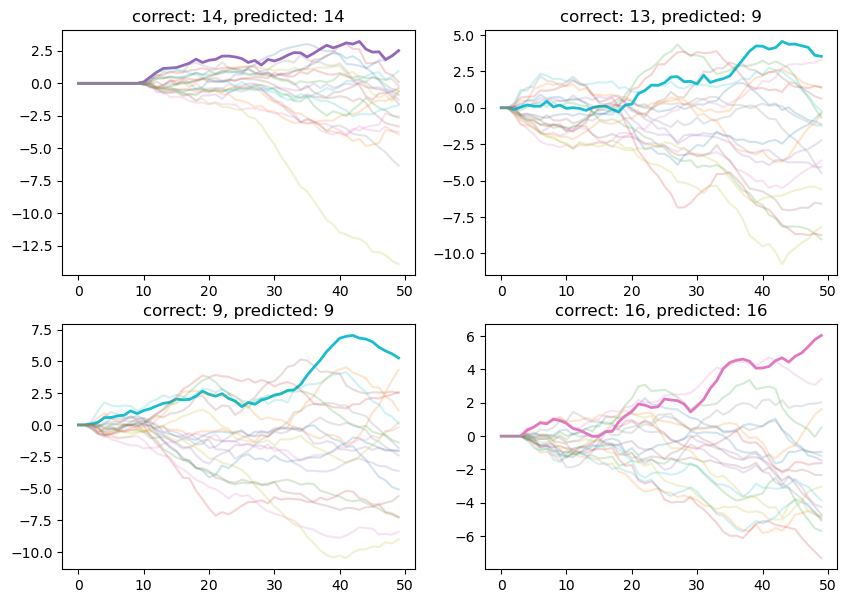

In [26]:
name = 'f_d_2l_ht_tt'
plt.figure(figsize=(10,7))
for x in range(4):
    plt.subplot(2, 2, x+1)
    plot_mem_correct(mems[name], refs[name], preds[name])

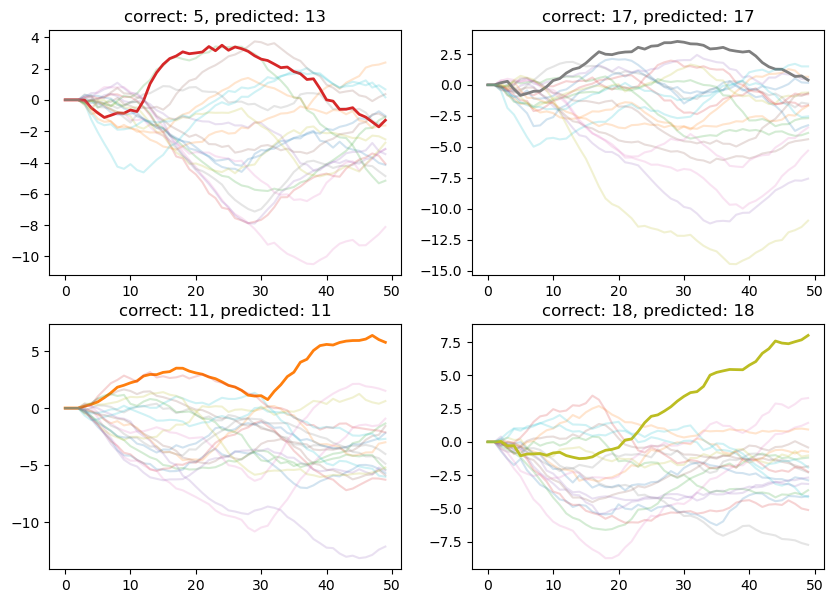

In [27]:
name = 'r_nd_2l_ht_tt'
plt.figure(figsize=(10,7))
for x in range(4):
    plt.subplot(2, 2, x+1)
    plot_mem_correct(mems[name], refs[name], preds[name])

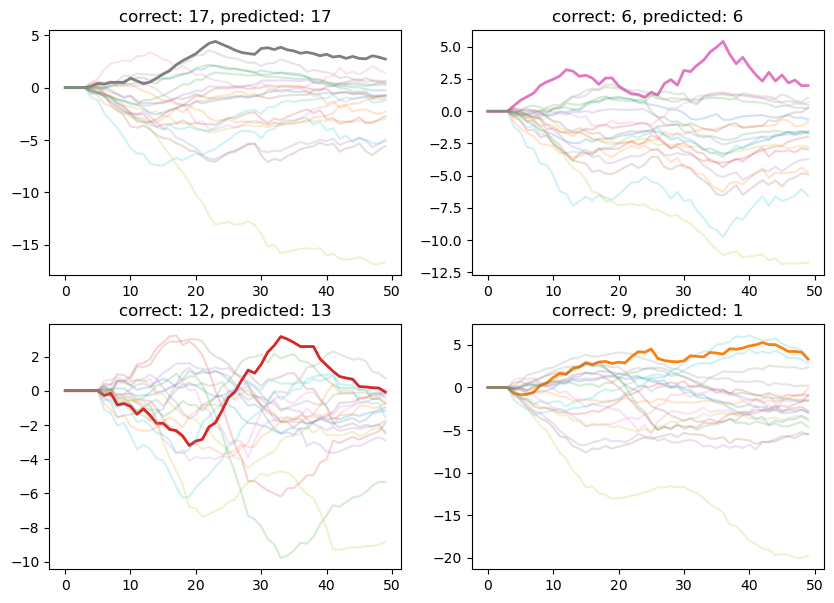

In [28]:
name = 'f_nd_4l_ht_tt'
plt.figure(figsize=(10,7))
for x in range(4):
    plt.subplot(2, 2, x+1)
    plot_mem_correct(mems[name], refs[name], preds[name])